In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import h5py
# from  flame_classification.flame_classification import FCA
from tensorflow import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.models import load_model
import tensorflow as tf
import random

Using TensorFlow backend.


#### Open flame type

In [2]:
### flame type data set
with h5py.File('../flame_classification/data//y_flames_classification.h5', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data_y = list(f[a_group_key])

Keys: <KeysViewHDF5 ['Y_data']>


In [3]:
data_y.pop(0)

0

#### Open Images

In [4]:
### image data set
with h5py.File('../flame_classification/data//x_flames_classification.h5', "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data_x = list(f[a_group_key])

Keys: <KeysViewHDF5 ['X_data']>


In [5]:
data_x.pop(0)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

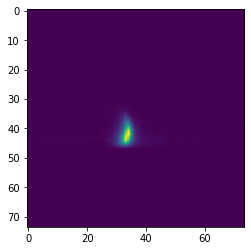

In [6]:
plt.imshow(data_x[-1])

#### Convert images to gray scale

In [7]:
x_data_gray = [((arr - arr.min()) * (1 / (arr.max() - arr.min())))
               for arr in data_x]

In [8]:
x_data_gray[1].shape

(74, 74)

#### Shuffling the dataset

In [9]:
c = list(zip(x_data_gray, data_y))

random.shuffle(c)

(x_data_gray, data_y) = zip(*c)

data_y = np.asarray(data_y).astype('uint8')

In [10]:
x_data_gray = np.asarray(x_data_gray)

In [11]:
class_names = ['Weak flame', 'FREI', 'Normal Flame']

In [12]:
mm = int(len(x_data_gray) * 0.8)
nn = int(len(x_data_gray) * 0.9)

In [13]:
X_train = x_data_gray[:mm]
X_test = x_data_gray[mm:nn]
X_valid = x_data_gray[nn:]
y_train = data_y[:mm]
y_test = data_y[mm:nn]
y_valid = data_y[nn:]

In [14]:
numb = 42
(numb)
tf.random.set_seed(numb)

In [15]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[74, 74]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 5476)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1643100   
_________________________________________________________________
dense_1 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 903       
Total params: 1,734,303
Trainable params: 1,734,303
Non-trainable params: 0
_________________________________________________________________


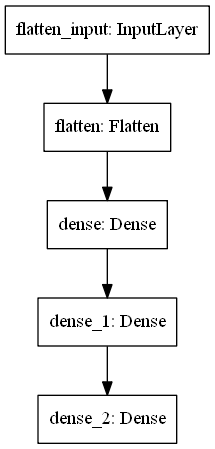

In [17]:
import pydot
keras.utils.plot_model(model)

In [18]:
# mcp_save = ModelCheckpoint('mdl_best.hdf5', save_best_only=True, monitor='val_accuracy', mode='max')

In [19]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer='sgd',
              metrics=["accuracy"])

In [20]:
model_history = model.fit(X_train,
                          y_train,
                          epochs=60,
                          validation_data=(X_valid, y_valid),
                         use_multiprocessing = True)
#                          callbacks=[mcp_save])

Train on 4728 samples, validate on 591 samples
Epoch 1/60
4728/4728 [==============================] - 2s 464us/sample - loss: 0.8680 - accuracy: 0.6618 - val_loss: 0.7517 - val_accuracy: 0.7716
Epoch 2/60
4728/4728 [==============================] - 2s 362us/sample - loss: 0.6985 - accuracy: 0.7587 - val_loss: 0.6282 - val_accuracy: 0.7750
Epoch 3/60
4728/4728 [==============================] - 2s 364us/sample - loss: 0.5940 - accuracy: 0.7781 - val_loss: 0.5466 - val_accuracy: 0.7919
Epoch 4/60
4728/4728 [==============================] - 2s 365us/sample - loss: 0.5211 - accuracy: 0.7970 - val_loss: 0.4895 - val_accuracy: 0.8088
Epoch 5/60
4728/4728 [==============================] - 2s 368us/sample - loss: 0.4667 - accuracy: 0.8118 - val_loss: 0.4510 - val_accuracy: 0.8173
Epoch 6/60
4728/4728 [==============================] - 2s 377us/sample - loss: 0.4283 - accuracy: 0.8274 - val_loss: 0.4174 - val_accuracy: 0.8240
Epoch 7/60
4728/4728 [==============================] - 2s 384us/

Epoch 56/60
4728/4728 [==============================] - 2s 354us/sample - loss: 0.1062 - accuracy: 0.9702 - val_loss: 0.1500 - val_accuracy: 0.9374
Epoch 57/60
4728/4728 [==============================] - 2s 352us/sample - loss: 0.1019 - accuracy: 0.9738 - val_loss: 0.1704 - val_accuracy: 0.9340
Epoch 58/60
4728/4728 [==============================] - 2s 331us/sample - loss: 0.1002 - accuracy: 0.9750 - val_loss: 0.1482 - val_accuracy: 0.9391
Epoch 59/60
4728/4728 [==============================] - 2s 337us/sample - loss: 0.0968 - accuracy: 0.9750 - val_loss: 0.1808 - val_accuracy: 0.9357
Epoch 60/60
4728/4728 [==============================] - 2s 352us/sample - loss: 0.0950 - accuracy: 0.9765 - val_loss: 0.1491 - val_accuracy: 0.9340


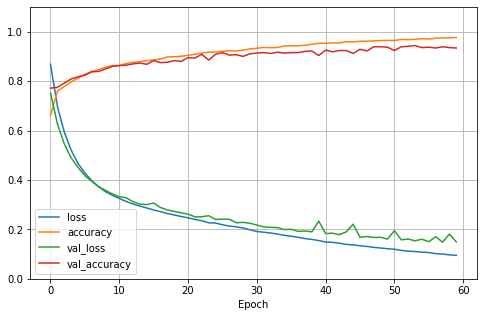

In [21]:
df = pd.DataFrame(model_history.history)
df.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1.1)
plt.xlabel('Epoch')
plt.show()

In [22]:
y_pred = model.predict_classes(X_test)

In [23]:
y_test

array([1, 0, 2, 0, 2, 2, 2, 2, 0, 1, 0, 1, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 0, 1, 1, 1, 0, 2, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 2, 2, 0,
       2, 2, 1, 1, 0, 1, 1, 0, 1, 2, 1, 0, 2, 1, 1, 2, 2, 1, 2, 1, 0, 2,
       1, 1, 0, 0, 2, 0, 0, 1, 1, 2, 2, 1, 2, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 2, 0, 0, 1, 2, 0, 2, 1, 0, 1, 0, 0, 1, 1, 1, 1, 2, 2, 0, 2, 2,
       2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 2, 0, 0, 2, 0, 2, 0, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 0, 0, 0, 2, 1, 1, 2, 2, 2,
       2, 0, 0, 1, 1, 2, 2, 2, 0, 2, 2, 1, 2, 1, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 1, 0, 1, 0, 0, 1, 2, 2, 2, 2, 1, 0, 2, 1, 2, 2, 1, 0, 0, 2, 0,
       0, 2, 0, 2, 2, 2, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 1, 0,
       1, 0, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 2, 0,
       0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 1, 0,
       1, 0, 1, 2, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2,

In [24]:
sum([1 for i in range(len(y_test)) if abs(y_pred - y_test)[i] != 0])

35

In [25]:
perc = (len(y_test) -sum([1 for i in range(len(y_test)) if abs(y_pred - y_test)[i] != 0]))/len(y_test)*100

In [26]:
print('{}% is the accuracy for the test dataset'.format(round(perc, 3)))

94.078% is the accuracy for the test dataset


In [27]:
train_predict = model.predict_classes(X_train)
val_predict = model.predict_classes(X_valid)
test_predict = model.predict_classes(X_test)

In [28]:
mpl.rcParams["font.family"] ='serif'
mpl.rcParams["font.size"] =7

In [29]:
y_train_calss = y_train
y_valid_calss = y_valid
y_test_calss = y_test

In [59]:
np.longdouble

numpy.longdouble

In [61]:
train_conf_matrix = tf.math.confusion_matrix(labels=y_train_calss, predictions=train_predict).numpy()
val_conf_matrix = tf.math.confusion_matrix(labels=y_valid_calss, predictions=val_predict).numpy()
test_conf_matrix = tf.math.confusion_matrix(labels=y_test_calss, predictions=test_predict).numpy()

In [31]:
labels = ['Weak flame', 'FREI', 'Normal flame']
import sklearn.metrics as metrics
import seaborn as sns

In [64]:
train_conf_matrix

array([[9.70742686e-01, 1.80045011e-02, 1.12528132e-02],
       [6.18982118e-03, 9.69738652e-01, 2.40715268e-02],
       [5.15198351e-04, 3.60638846e-03, 9.95878413e-01]])

In [63]:

train_conf_matrix = train_conf_matrix.astype('float64') /train_conf_matrix.sum(axis=1)[:, np.newaxis]
val_conf_matrix  =  val_conf_matrix.astype('float64') /  val_conf_matrix.sum(axis=1)[:, np.newaxis]
test_conf_matrix =  test_conf_matrix.astype('float64') / test_conf_matrix.sum(axis=1)[:, np.newaxis]

In [ ]:
fig, ax = plt.subplots(1,3,figsize = (8,3), dpi=200)
sns.heatmap(train_conf_matrix, annot = True, cmap=plt.cm.Greens,ax=ax[0],cbar=False)
sns.heatmap(val_conf_matrix, annot = True, cmap=plt.cm.Greens,ax=ax[1],cbar=False)
sns.heatmap(test_conf_matrix, annot = True, cmap=plt.cm.Greens,ax=ax[2],cbar=False)
ax[0].set_xticklabels(labels,rotation = 45)
ax[1].set_xticklabels(labels,rotation = 45)
ax[2].set_xticklabels(labels,rotation = 45)
ax[0].set_yticklabels(labels,rotation = 45)
ax[0].set_ylabel('True Label')
ax[1].set_xlabel('Predicted label')
ax[1].set_yticks([])
ax[2].set_yticks([])
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])
ax[0].set_title('Training')
ax[1].set_title('Validation')
ax[2].set_title('Test')
plt.show()

In [34]:
train_conf_matrix

array([[9.70742686e-01, 1.80045011e-02, 1.12528132e-02],
       [6.18982118e-03, 9.69738652e-01, 2.40715268e-02],
       [5.15198351e-04, 3.60638846e-03, 9.95878413e-01]])

In [35]:
train_predict.shape

(4728,)

In [36]:
y_train_calss.shape

(4728,)

In [42]:
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import classification_report

In [65]:
precision, recall, fscore, support = score(y_train, train_predict)

In [66]:
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))

precision: [0.99233129 0.97848716 0.97478568]
recall: [0.97074269 0.96973865 0.99587841]
fscore: [0.98141828 0.97409326 0.98521916]
support: [1333 1454 1941]


In [40]:
y_true = [2, 0, 2, 2, 0, 1]
y_pred = [0, 0, 2, 2, 0, 2]

In [68]:
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test_calss, test_predict, target_names=labels, digits=4))

              precision    recall  f1-score   support

  Weak flame     0.9516    0.9316    0.9415       190
        FREI     0.9056    0.9157    0.9106       178
Normal flame     0.9600    0.9686    0.9643       223

    accuracy                         0.9408       591
   macro avg     0.9391    0.9386    0.9388       591
weighted avg     0.9409    0.9408    0.9408       591

